In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import resample 
import pandas as pd
import numpy as np
import os, random
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pickle 

(array([3.62622783e-07, 1.71761455e-10, 5.49636655e-11, 3.43522909e-11,
        2.06113746e-11, 2.06113746e-11, 6.87045818e-12, 0.00000000e+00,
        0.00000000e+00, 6.87045818e-12, 0.00000000e+00, 0.00000000e+00,
        6.87045818e-12, 1.37409164e-11, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.87045818e-12]),
 array([       0.        ,  2755076.66666667,  5510153.33333333,
         8265230.        , 11020306.66666667, 13775383.33333333,
        16530460.        , 19285536.66666666, 22040613.33333333,
        24795690.        , 27550766.66666666, 30305843.33333333,
        33060920.        , 35815996.66666666, 38571073.33333333,
        41326150.        , 44081226.66666666, 46836303.33333333,
        49591380.        , 52346456.66666666, 55101533.33333333,

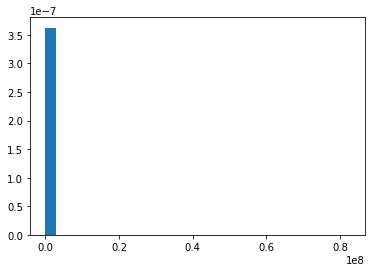

In [23]:
#read in the case table
fpath = os.path.join(".data", "casetable.psv")
df = pd.read_csv(fpath, sep = "|")

plt.hist(df['Assessed Value'], density=True, bins=30)

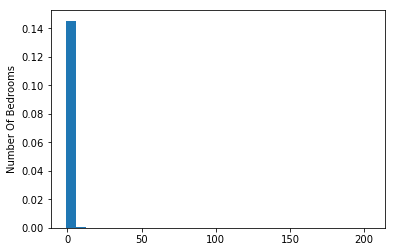

In [24]:
plt.ylabel('AssessedValue')

df.columns.values
plt.hist(df['Number Of Bedrooms'], density=True, bins=30)
plt.ylabel('Number Of Bedrooms')

df = df[df['Assessed Value']<1000000]
df = df[df['Number Of Bedrooms']<10]
df.fillna(-999,inplace = True)

y = df['Assessed Value']

df.drop(['Parcel Number','Section','Township','Total Market Value',
         'Assessed Value','Total Just Value', 'Site Address Number',
         'Site Address Street Name','Site Address Street Type',
         'Site Address Unit Number','Site Address City','Building Number',
         'Exemption Code', 'Date of Sale', 'Sale Price','Site Zip Code',
         'Amenity Item Code', "building value"], axis = 1, 
         inplace = True)

In [25]:
def split(df, pct=.7):
    tr, xv = [], []
     
    indices = [x for x in df.index]
    random.shuffle(indices)
 
    for ind in indices:
        if np.random.rand() <= pct:
            tr.append(ind)
        else:
            xv.append(ind)
 
    return tr, xv

In [26]:
tr_indices, xv_indices = split(df)

features_tr = df.loc[tr_indices, :]
features_xval = df.loc[xv_indices, :]
y_tr = y.loc[tr_indices]
y_xval = y.loc[xv_indices]

In [27]:
#create split function
random.seed(19860406)
np.random.seed(19860406)

rfc = RandomForestRegressor(
        max_depth = 5, 
        n_estimators = 25, 
        min_samples_leaf = 15)

rfc.fit(features_tr, y_tr.values.ravel())

tr_yhat2 = rfc.predict(features_tr)
xval_yhat2 = rfc.predict(features_xval)

tr_MSE = metrics.mean_squared_error(y_tr, tr_yhat2)
xval_MSE = metrics.mean_squared_error(y_xval, xval_yhat2)


In [28]:
df_fits =  pd.DataFrame(rfc.predict(features))
df_full = pd.concat([df, df_fits], axis = 1)

In [30]:
with open(os.path.join(".model", 'model.pckl'), 'wb') as f:
   pickle.dump(rfc, f,  pickle.HIGHEST_PROTOCOL)